# Vorbereitung  
## Spektrometrische Messverfahren für $\alpha$-Strahlen  
__Ionisationskammer__: Gasvolumen zwischen zwei Elektroden einer Spannung $U$. Ist $U$ ausreichend hoch, gelangen alle entstehenden Ionen zu den Elektroden und tragen zum Messstrom bei. In diesem Bereich hängt der Messtrom nurnoch von der Größe des Gasvolumens und der Probe selbst ab.  
__Halbleiterzähler__: Spezielle, niedrig dotierte Diode. Ionisierende Teilchen (hier $\alpha$) erzeugen am pn-Übergang Elektron-Loch-Paare die im Feld des pn-Übergangs getrennt und über seitliche Elektroden abfließen. Diese Ladungsträger wiederum erzeugen an einem Widerstand einen messbaren Spannungsabfall der proportional zum Ionisationsvermögen und damit der Energie der Strahlung ist.  


## Oberflächensperrschichtdetektoren  
Basierend auf dem Prinzip der _Schottky_-Diode. Eine Metall-Halbleiterdiode wird in Sperrrichtung mit einer Gleichspannung Betrieben. Bei Ionisation an der Grenzschicht entstehen bewegliche Ladungsträger die als Strompuls messbar sind. Vorteil ist durch ihre geringe Dicke/Baugröße eine gute Messbarkeit von $\alpha$-Strahlung (geringe Eindringtiefe).

## Radium 226, Radium Folgeprodukte  
\begin{align}
    ^{226}_{80}\text{Ra} &\longrightarrow ^{222}_{86}\text{Rn} + \alpha (+ \gamma_{186 keV}) \\
    ^{222}_{86}\text{Rn} &\longrightarrow ^{218}_{84}\text{Po} + \alpha \\
    ^{218}_{84}\text{Po} &\longrightarrow ^{214}_{82}\text{Pb} + \alpha \\
    ^{214}_{82}\text{Pb} &\longrightarrow ^{214}_{83}\text{Bi} + \beta^- (+\gamma_{352, 295, 242, 53 keV} \\
    ^{214}_{83}\text{Bi} &\longrightarrow ^{214}_{84}\text{Po} + \beta^- (+\gamma_{609 keV} \\
    ...
\end{align}

## Zerfallsgesetz, Erweitertes Zerfallsgesetz  
\begin{equation}
	N(t) = N_0 \cdot e^{-\frac{t}{\tau}}
\end{equation}

## Vielkanalimpulshöhenanalysator, ADC  
Impulse werden anhand ihrer Amplitude und Pulsrate klassifiziert. Im internen __A__nalog-__D__igital-__C__onverter werden die Impulse - nach dem sie z.B. in einem Halbleiterdetektor ausgelößt und von einem Vorverstärker verstärkt wurden - nach ihrer Amplitude digitalisiert und an nachgeordnete Auswerteelektronik weiter gereicht.

## Entstehung des Impulshöhenspektrums, Energiekalibrierung  
Werden die Impulse nach Anzahl in der Veretikalen und Amplitude in der Horizontalen aufgetragen wird das entstehende Histogram Impulshöhenspektrum genannt. Es ist anzunehmen, dass die Impulshöhenverteilung bei einer bestimmten Strahlenquelle um eine definierte Energie normalverteilt ist. Mit einem bekannten Strahler wird zur Energiekalibrierung die Glocke entsprechend horizontal verschoben.

## Zerfall von Am-241, $\alpha$-Energien  
$T_{1/2} = 432,2 a$  
\begin{equation}
	^{241}_{95}\text{Am} \longrightarrow ^{237}_{93}\text{Np} + \alpha + \gamma_{59,5409 keV}
\end{equation}
Zu erwartende $\alpha$-Energien: $5,486 \text{MeV}$ (85%), $5,443 \text{MeV}$ (13%) und $5,388 \text{MeV}$ (2%).

## Reichweite von $\alpha$-Teilchen, Vorabsorption  
![alt text](referenzen/a-reichweite.jpg "Reichweite von $\alpha$-Teilchen durch Materie")  
Quelle: Eichler, Kronfeldt, Sahm - "Das neue physikalische Grundpraktikum", 2016  
_Bragg_-Beziehung.

## Alphaspektrometer (Bedienungsanleitung) 

## Nulleffekts  
Zählrate $\neq 0$ bei Abwesenheit des untersuchten Strahlers.  
Ursächlich sind hier meist natürliche und/oder kosmische Hintergrundstrahlung. Im Falle des Halbleiterdetektors können aber auch Tunneleffekte an der Grenzschicht false-positives erzeugen. Die Nullrate muss im Vorfeld gemessen werden um die Abweichung der eigentlichen Messung zu minimieren.

In [254]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import csv
import copy

In [255]:
# Lets create a list of all the data files included in "messdaten/" subdirectory
sample_files = os.listdir("messdaten/")
print(sample_files)

['Am241_first_try_ohne_vac(1).csv', 'Am241_first_try_ohne_vac.csv', 'Am241_mit_vac.csv', 'Am241_mit_vac_Al.csv', 'Leer_ohne_vac.csv', 'Ra226_mit_vac.csv']


In [256]:
# Opening the data iterating over all the files found int eh cell above
spl_lst = []
for i,file in enumerate(sample_files):
    with open(("messdaten/" + file), newline='', encoding='utf-8') as path:
        frame = pd.read_csv(path, delimiter=';')
        frame.columns = [col.strip() for col in frame] # stupid whitespaces t(-_-t)
        spl_lst.append(frame)
        del frame

# print(spl_lst[0])
Am_wo_vac = spl_lst[1]
Am_w_vac = spl_lst[2]
Am_w_vac_w_Al = spl_lst[3]
Empty_wo_vac = spl_lst[4]
Ra_w_vac = spl_lst[5]

In [257]:
print(Am_wo_vac)

      Kanal  Energie(keV)  Impulse
0         1           1.0        0
1         2           2.0        0
2         3           3.0        0
3         4           4.0        0
4         5           5.0        0
...     ...           ...      ...
2043   2044        2044.0        0
2044   2045        2045.0        0
2045   2046        2046.0        0
2046   2047        2047.0        0
2047   2048        2048.0        0

[2048 rows x 3 columns]


Erster (unkalibrierter) Plot.

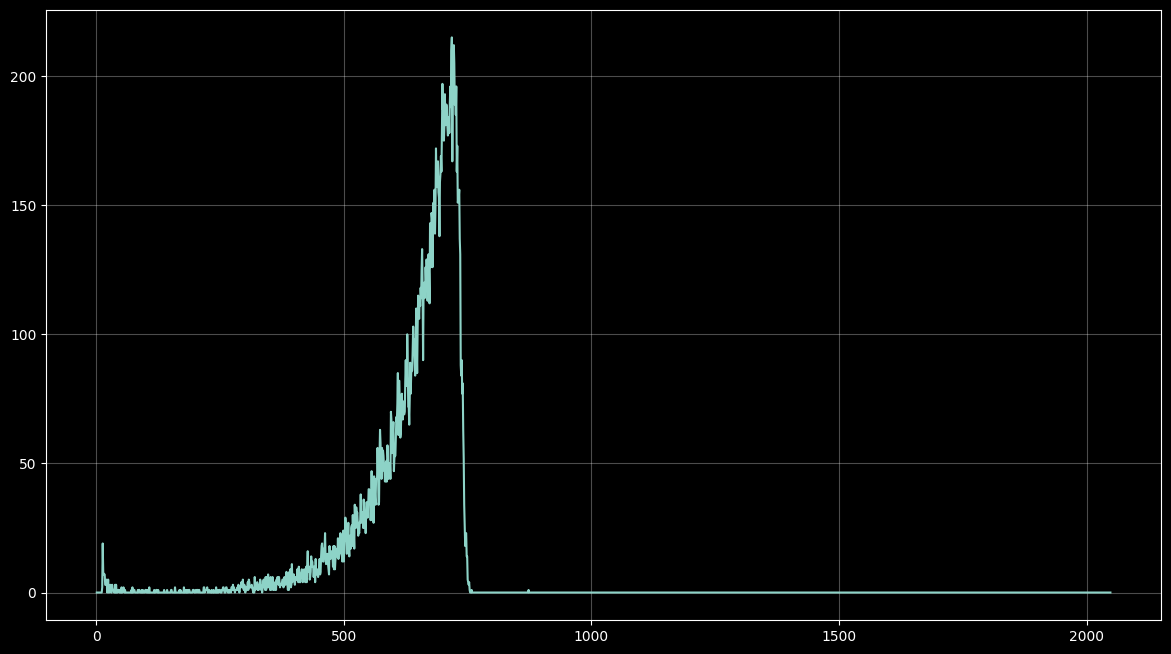

In [258]:
cm = 1/2.54 # inch to cm, metric like brrr

# Nightowl mode
plt.style.use("default")
plt.style.use("dark_background")

fig, ax = plt.subplots(figsize=(30*cm, 30*(9/16)*cm))

ax.plot(Am_wo_vac["Energie(keV)"], Am_wo_vac["Impulse"])
ax.grid(axis='both', alpha=.3)

plt.tight_layout()

Um die Daten zu kalibrieren, müssen die ``Energie(keV)``-Zeilen so entlang der ``Impulse``-Zeilen verschoben werden, dass der Peak bei der entsprechenden Energie zum liegen kommt.  

Wie gehen wir dabei vor?

1. Nachsehen, ob die erwartete Energie in ``Energie(keV)`` enthalten ist.
2. Wenn ja -> Zeilenindex der Energie finden.
3. Wenn nein -> Oben oder unten solange Energien hinzufügen, bis die erwartete Energie in der Mitte liegt
4. Den Index der Zeile mit der höchsten Anzahl Impulse finden
5. Zeilen der ``Impulse`` so verschieben, dass Peak-Index bei der erwarteten Energie liegen bleibt.
6. Falls notwendig übrige ``Impulse``-Zeilen mit ``0`` auffüllen/ersetzen.

In [259]:
# 1.- 3.
def ManipEnergyRange(frame, energy):
    energies = frame["Energie(keV)"].to_numpy()

    # 2. and 3.
    if energy in energies:
        index = np.where(energies == float(energy))
        return index[0]

    # 4.
    else:
        mididx = int(np.floor(np.median(energies))) # get mid index

        diff_to_shift = int(energy - np.max(energies)) # compute the no. of indices to shift the energies
        nrg_to_add = np.arange(np.max(energies), 2*energy, 1) # add energy range to array...
        energies = np.append(energies, nrg_to_add) # ...and append
        energies = np.roll(energies, -(diff_to_shift + mididx)) # move target energy to mid index
        reshaped_energies = energies[:2*mididx] # getting array back in shape

        frame["Energie(keV)"] = reshaped_energies # finally, replace energies column of input dataframe with the fruits of our labor
        # print(frame)
        return frame

In [260]:
# 4. and 5.
def ShiftPeak(frame):
    pulses = frame["Impulse"].to_numpy()
    mididx = int(np.floor(len(pulses) / 2)) # get mid index
    peakidx = 0

    peaks = np.where(pulses == np.max(pulses)) # get indices of peaks
    for i,peaks in enumerate(peaks): # get the center location of the peaks
        peakidx = peakidx + peaks[i]
    if len(peaks) > 1:
        peakidx = np.floor(peakidx / len(peaks))
    # print(peakidx)

    # alternatively
    # peakidx = frame["Impulse"].idxmax()

    diff_to_shift = int(mididx - peakidx) # compute the number of shifts to center the peak
    if diff_to_shift == 0: # check if peak is already centered
        print("Peak already centered")
    pulses = np.roll(pulses, diff_to_shift) # centering peak

    frame["Impulse"] = pulses # replace pulses column with shifted pulses
    return frame

In [261]:
Am_wo_vac_mod = copy.deepcopy(Am_wo_vac)
Am_wo_vac_mod = ManipEnergyRange(Am_wo_vac_mod, 5486)
Am_wo_vac_mod = ShiftPeak(Am_wo_vac_mod)
# print(Am_wo_vac_mod)

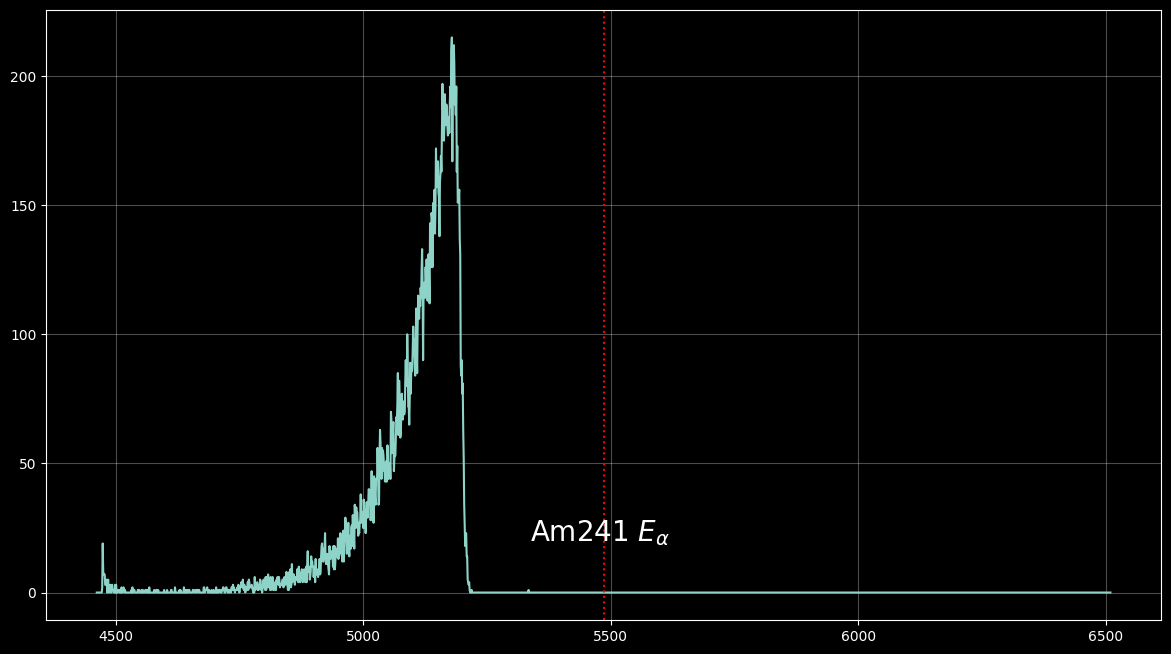

In [275]:
# Nightowl mode
plt.style.use("default")
plt.style.use("dark_background")

fig, ax = plt.subplots(figsize=(30*cm, 30*(9/16)*cm))

ax.plot(Am_w_vac["Energie(keV)"], Am_wo_vac["Impulse"])
ax.axvline(x=5486, linestyle="dotted", label="Erwartete Energie", color="#FF0000")
ax.text(5336, 20, "Am241 $E_{\\alpha}$", size=20)
ax.grid(axis='both', alpha=.3)

plt.tight_layout()

Es Scheint sinnvoll, einige der Werte $= 0$ jeweils von links und rechts weg zu kürzen:

In [263]:
def PlotRange(frame, lthreshold, rthreshold, lmargin=0, rmargin=0):
    pulses = frame["Impulse"].to_numpy() # we know this already
    
    # some sanity checks
    if np.argmax(pulses > lthreshold) - lmargin < 1: # left hand side
        print("Lower limit out ouf boundary. Set to Zero.")
        first = frame["Energie(keV)"][1]
    else:
        first = frame["Energie(keV)"][np.argmax(pulses > lthreshold) - lmargin] # get lower energy
    if len(frame) + rmargin - 1 - np.argmax(pulses[::-1] > rthreshold) > len(frame): # right hand side
        print("Lower limit out ouf boundary. Set to max.")
        last = frame["Energie(keV)"][len(frame)-1]
    else:
        last = frame["Energie(keV)"][len(frame) + rmargin - 1 - np.argmax(pulses[::-1] > rthreshold)] # get upper energy
    return (first,last)

In [264]:
print(PlotRange(Am_wo_vac_mod, 10, 10))
# print(len(Am_wo_vac_mod["Impulse"], len(Am_wo_vac["Energie(keV)"])))

(4781.0, 5517.0)


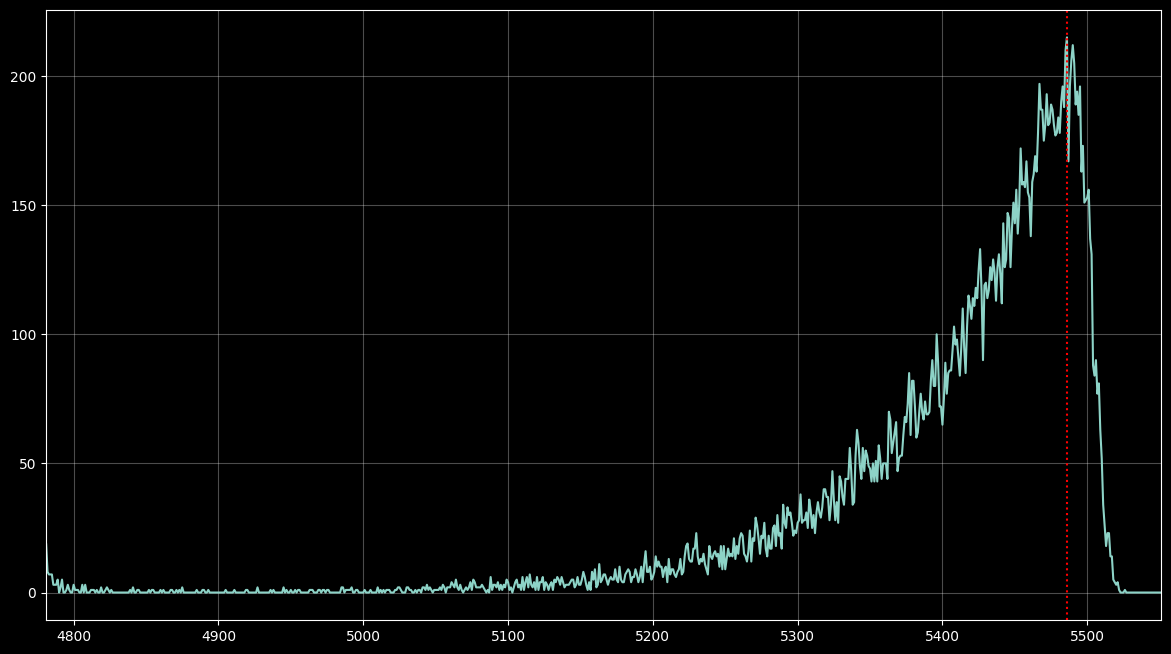

In [273]:
# Nightowl mode
plt.style.use("default")
plt.style.use("dark_background")

fig, ax = plt.subplots(figsize=(30*cm, 30*(9/16)*cm))

ax.plot(Am_wo_vac_mod["Energie(keV)"], Am_wo_vac_mod["Impulse"])
ax.set_xlim(PlotRange(Am_wo_vac_mod, 3, 3, 0, 30))
ax.axvline(x=5486, linestyle="dotted", label="Erwartete Energie", color="#FF0000")
ax.grid(axis='both', alpha=.3)

plt.tight_layout()

Und jetzt alle übereinander

In [266]:
print(Am_w_vac)

      Kanal  Energie(keV)  Impulse
0         1           1.0        0
1         2           2.0        0
2         3           3.0        0
3         4           4.0        0
4         5           5.0        0
...     ...           ...      ...
2043   2044        2044.0        0
2044   2045        2045.0        0
2045   2046        2046.0        0
2046   2047        2047.0        0
2047   2048        2048.0        0

[2048 rows x 3 columns]


In [267]:
Am_w_vac = ManipEnergyRange(Am_w_vac, 5486)
Am_w_vac = ShiftPeak(Am_w_vac)

Am_w_vac_w_Al = ManipEnergyRange(Am_w_vac_w_Al, 5486)
Am_w_vac_w_Al = ShiftPeak(Am_w_vac_w_Al)

Ra_w_vac = ManipEnergyRange(Ra_w_vac, 6115)
Ra_w_vac = ShiftPeak(Ra_w_vac)

# Am_wo_vac = spl_lst[1]
# Am_w_vac = spl_lst[2]
# Am_w_vac_w_Al = spl_lst[3]
# Empty_wo_vac = spl_lst[4]
# Ra_w_vac = spl_lst[5]

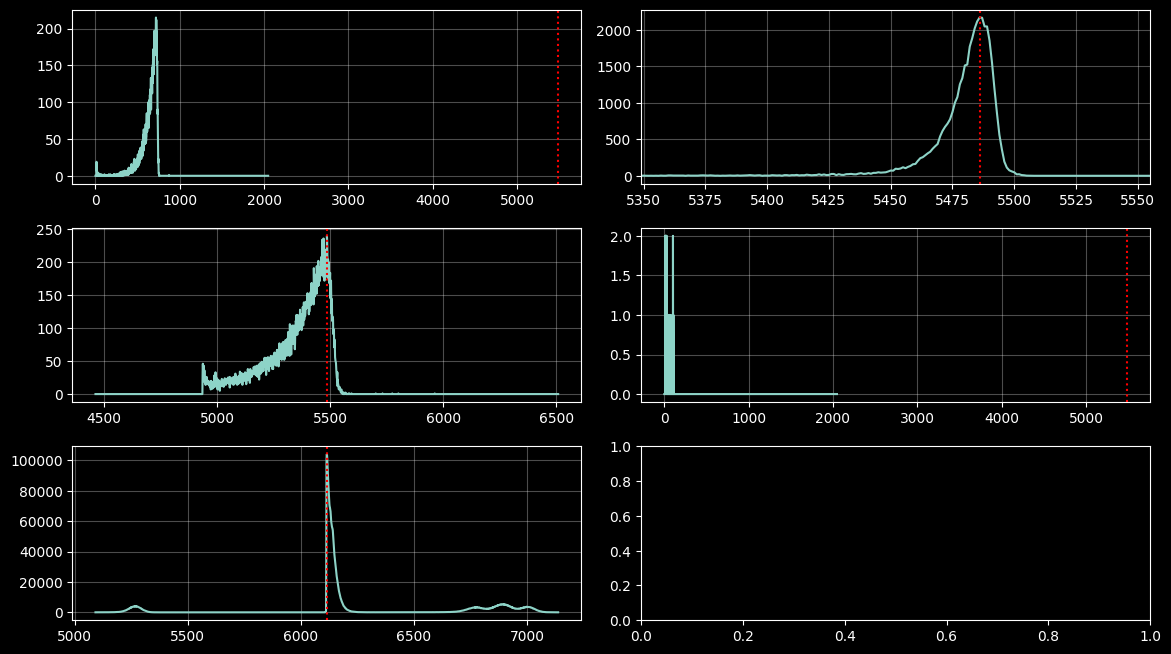

In [268]:
# Nightowl mode
plt.style.use("default")
plt.style.use("dark_background")

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(ncols=2, nrows=3, figsize=(30*cm, 30*(9/16)*cm))

ax1.plot(Am_wo_vac["Energie(keV)"], Am_wo_vac["Impulse"])
# ax1.set_xlim(PlotRange(Am_wo_vac, 1, 1))
ax1.axvline(x=5486, linestyle="dotted", label="Erwartete Energie", color="#FF0000")
ax1.grid(axis='both', alpha=.3)

ax2.plot(Am_w_vac["Energie(keV)"], Am_w_vac["Impulse"])
ax2.set_xlim(PlotRange(Am_w_vac, 0, 1, -800, 50))
ax2.axvline(x=5486, linestyle="dotted", label="Erwartete Energie", color="#FF0000")
ax2.grid(axis='both', alpha=.3)

ax3.plot(Am_w_vac_w_Al["Energie(keV)"], Am_w_vac_w_Al["Impulse"])
# ax3.set_xlim(PlotRange(Am_w_vac_w_Al, 0, 0))
ax3.axvline(x=5486, linestyle="dotted", label="Erwartete Energie", color="#FF0000")
ax3.grid(axis='both', alpha=.3)

ax4.plot(Empty_wo_vac["Energie(keV)"], Empty_wo_vac["Impulse"])
# ax4.set_xlim(PlotRange(Empty_wo_vac, 0, 0))
ax4.axvline(x=5486, linestyle="dotted", label="Erwartete Energie", color="#FF0000")
ax4.grid(axis='both', alpha=.3)

ax5.plot(Ra_w_vac["Energie(keV)"], Ra_w_vac["Impulse"])
# ax5.set_xlim(PlotRange(Ra_w_vac, 0, 0))
ax5.grid(axis='both', alpha=.3)
ax5.axvline(x=6115, linestyle="dotted", label="Erwartete Energie", color="#FF0000")

plt.tight_layout()

In [269]:
arr = np.array([0,0,1,2,3,4,0,2,0])
first = np.argmax(arr > 1)
last = np.argmax(arr[::-1] > 1)
print(first, last)

3 1


In [270]:
df = pd.DataFrame(np.arange(40).reshape(10, 4),
                  columns=['A', 'B', 'C', 'D'])
print(df)

    A   B   C   D
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15
4  16  17  18  19
5  20  21  22  23
6  24  25  26  27
7  28  29  30  31
8  32  33  34  35
9  36  37  38  39


In [271]:
df.drop(df.index[0:3], inplace=True)
print(df)

    A   B   C   D
3  12  13  14  15
4  16  17  18  19
5  20  21  22  23
6  24  25  26  27
7  28  29  30  31
8  32  33  34  35
9  36  37  38  39
